Using device: mps


100%|██████████| 170M/170M [01:42<00:00, 1.66MB/s] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8509804].


Images shape: torch.Size([256, 3, 32, 32]), Labels shape: torch.Size([256])


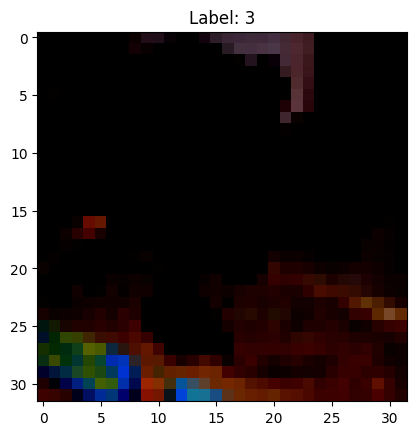


--- SGD vs Adam Comparison ---
Epoch 1, Loss: 1.9054, Train Acc: 0.4073, Test Acc: 0.4100
Epoch 2, Loss: 1.6076, Train Acc: 0.4686, Test Acc: 0.4624
Epoch 3, Loss: 1.4917, Train Acc: 0.5033, Test Acc: 0.4846
Epoch 4, Loss: 1.4101, Train Acc: 0.5245, Test Acc: 0.4960
Epoch 5, Loss: 1.3414, Train Acc: 0.5535, Test Acc: 0.5075
Epoch 6, Loss: 1.2841, Train Acc: 0.5845, Test Acc: 0.5212
Epoch 7, Loss: 1.2273, Train Acc: 0.5889, Test Acc: 0.5226
Epoch 8, Loss: 1.1831, Train Acc: 0.6103, Test Acc: 0.5319
Epoch 9, Loss: 1.1425, Train Acc: 0.6337, Test Acc: 0.5354
Epoch 10, Loss: 1.0993, Train Acc: 0.6459, Test Acc: 0.5330
Epoch 11, Loss: 1.0555, Train Acc: 0.6622, Test Acc: 0.5351
Epoch 12, Loss: 1.0179, Train Acc: 0.6783, Test Acc: 0.5383
Epoch 13, Loss: 0.9762, Train Acc: 0.6828, Test Acc: 0.5300
Epoch 14, Loss: 0.9374, Train Acc: 0.7042, Test Acc: 0.5321
Epoch 15, Loss: 0.8969, Train Acc: 0.7033, Test Acc: 0.5293
Epoch 16, Loss: 0.8752, Train Acc: 0.7167, Test Acc: 0.5329
Epoch 17, Loss: 0

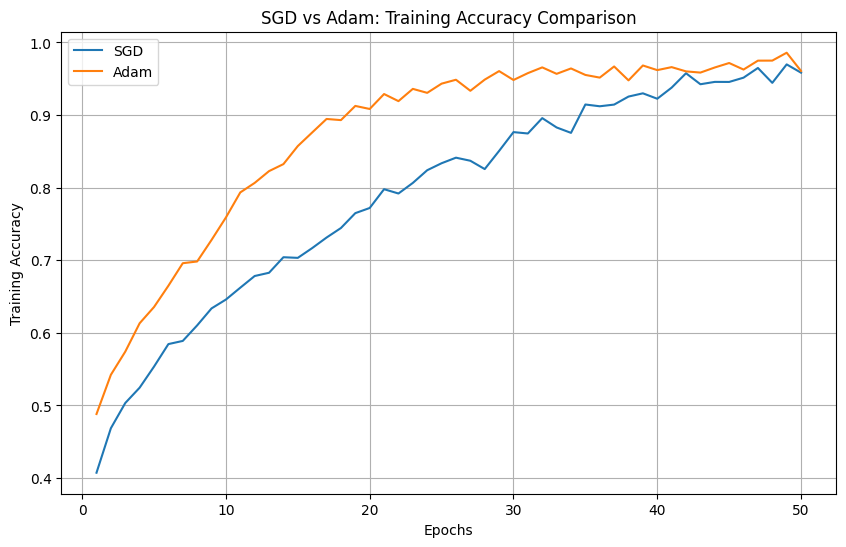


--- LeakyReLU vs Sigmoid Comparison ---
Epoch 1, Loss: 1.8163, Train Acc: 0.4253, Test Acc: 0.4198
Epoch 2, Loss: 1.6048, Train Acc: 0.4720, Test Acc: 0.4546
Epoch 3, Loss: 1.5028, Train Acc: 0.4916, Test Acc: 0.4641
Epoch 4, Loss: 1.4193, Train Acc: 0.5225, Test Acc: 0.4783
Epoch 5, Loss: 1.3464, Train Acc: 0.5609, Test Acc: 0.4966
Epoch 6, Loss: 1.2745, Train Acc: 0.5868, Test Acc: 0.4992
Epoch 7, Loss: 1.2058, Train Acc: 0.6145, Test Acc: 0.5012
Epoch 8, Loss: 1.1391, Train Acc: 0.6332, Test Acc: 0.5071
Epoch 9, Loss: 1.0753, Train Acc: 0.6701, Test Acc: 0.5051
Epoch 10, Loss: 1.0001, Train Acc: 0.6787, Test Acc: 0.5029
Epoch 11, Loss: 0.9501, Train Acc: 0.6969, Test Acc: 0.4983
Epoch 12, Loss: 0.8815, Train Acc: 0.7263, Test Acc: 0.5002
Epoch 13, Loss: 0.8129, Train Acc: 0.7599, Test Acc: 0.4993
Epoch 14, Loss: 0.7576, Train Acc: 0.7829, Test Acc: 0.4967
Epoch 15, Loss: 0.7028, Train Acc: 0.8014, Test Acc: 0.5014
Epoch 16, Loss: 0.6447, Train Acc: 0.8097, Test Acc: 0.4898
Epoch 17

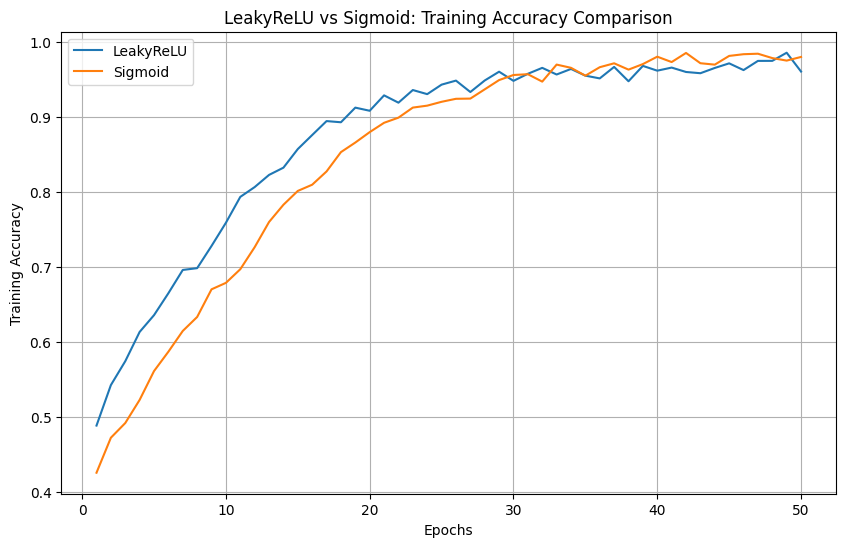


--- Dropout Model Training ---
Epoch 1, Loss: 1.6706, Train Acc: 0.4829, Test Acc: 0.4679
Epoch 2, Loss: 1.4700, Train Acc: 0.5299, Test Acc: 0.4968
Epoch 3, Loss: 1.3733, Train Acc: 0.5559, Test Acc: 0.5104
Epoch 4, Loss: 1.2932, Train Acc: 0.5859, Test Acc: 0.5231
Epoch 5, Loss: 1.2318, Train Acc: 0.6015, Test Acc: 0.5253
Epoch 6, Loss: 1.1830, Train Acc: 0.6394, Test Acc: 0.5433
Epoch 7, Loss: 1.1217, Train Acc: 0.6517, Test Acc: 0.5420
Epoch 8, Loss: 1.0753, Train Acc: 0.6761, Test Acc: 0.5499
Epoch 9, Loss: 1.0316, Train Acc: 0.6956, Test Acc: 0.5568
Epoch 10, Loss: 0.9878, Train Acc: 0.7080, Test Acc: 0.5464
Epoch 11, Loss: 0.9478, Train Acc: 0.7281, Test Acc: 0.5497
Epoch 12, Loss: 0.9143, Train Acc: 0.7474, Test Acc: 0.5504
Epoch 13, Loss: 0.8730, Train Acc: 0.7555, Test Acc: 0.5507
Epoch 14, Loss: 0.8431, Train Acc: 0.7671, Test Acc: 0.5552
Epoch 15, Loss: 0.8043, Train Acc: 0.7867, Test Acc: 0.5552
Epoch 16, Loss: 0.7783, Train Acc: 0.8024, Test Acc: 0.5595
Epoch 17, Loss: 0

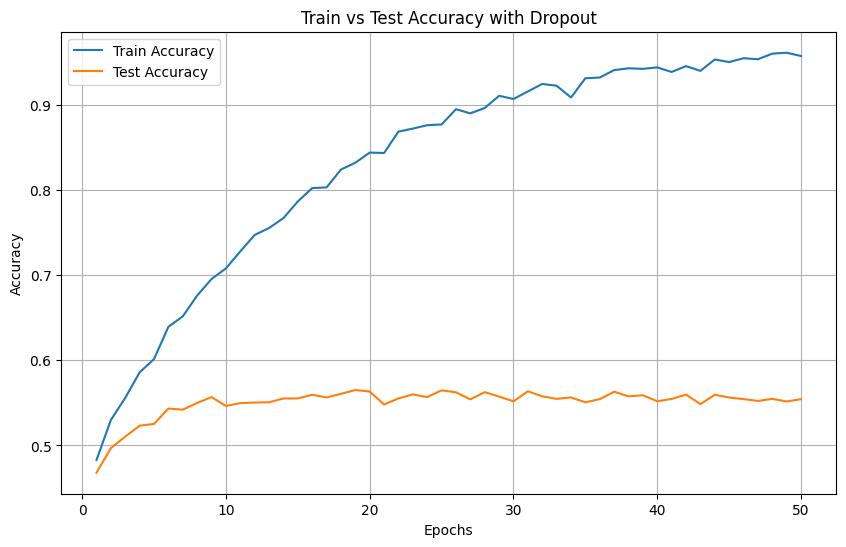

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt

# 디바이스 설정 (CUDA, MPS 또는 CPU)
device = torch.device("mps" if torch.backends.mps.is_available() else 
                     ("cuda" if torch.cuda.is_available() else "cpu"))
print(f"Using device: {device}")

# 데이터셋 준비 (MNIST에서 CIFAR10으로 변경)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 훈련 데이터 로드
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# 테스트 데이터 로드
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 배치 사이즈 설정
batch_size = 256

# 데이터 로더 생성
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

# 테스트 데이터 로더 생성
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

# CIFAR10 데이터셋 형태 확인
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

# 첫 이미지 시각화
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.title(f'Label: {labels[0]}')
plt.show()

# 1. LeakyReLU를 사용한 모델 정의
class LeakyReLUModel(nn.Module):
    def __init__(self):
        super().__init__()
        # CIFAR10은 32x32x3 이미지 (3072개 픽셀)
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)  # 10개 클래스 (CIFAR10)
        self.act = nn.LeakyReLU(0.1)  # ReLU 대신 LeakyReLU 사용

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  # 이미지 평탄화
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)
        return x

# 2. Sigmoid를 사용한 모델 정의
class SigmoidModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.act = nn.Sigmoid()  # LeakyReLU 대신 Sigmoid 사용

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Dropout을 적용한 LeakyReLU 모델 정의
class DropoutLeakyReLUModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.act = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.1)  # Dropout 확률 0.1

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(self.act(self.fc1(x)))
        x = self.dropout(self.act(self.fc2(x)))
        x = self.fc3(x)
        return x

# 정확도 측정 함수
def accuracy(model, dataloader):
    cnt = 0
    acc = 0
    
    with torch.no_grad():
        model.eval()  # 평가 모드 설정
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            
            cnt += labels.shape[0]
            acc += (labels == preds).sum().item()
    
    return acc / cnt

# 훈련 함수
def train_model(model, optimizer, n_epochs=50, model_name="Model"):
    criterion = nn.CrossEntropyLoss()
    train_accs = []
    test_accs = []
    
    for epoch in range(n_epochs):
        model.train()  # 훈련 모드 설정
        running_loss = 0.0
        
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        # 에폭마다 정확도 계산
        train_acc = accuracy(model, trainloader)
        test_acc = accuracy(model, testloader)
        
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    
    return train_accs, test_accs

# 1. SGD와 Adam 성능 비교
print("\n--- SGD vs Adam Comparison ---")
leaky_relu_model_sgd = LeakyReLUModel().to(device)
leaky_relu_model_adam = LeakyReLUModel().to(device)

optimizer_sgd = optim.SGD(leaky_relu_model_sgd.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(leaky_relu_model_adam.parameters(), lr=0.001)

train_accs_sgd, _ = train_model(leaky_relu_model_sgd, optimizer_sgd, n_epochs=50, model_name="LeakyReLU (SGD)")
train_accs_adam, _ = train_model(leaky_relu_model_adam, optimizer_adam, n_epochs=50, model_name="LeakyReLU (Adam)")

# Plot 1: SGD vs Adam (Train Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accs_sgd, label='SGD')
plt.plot(range(1, 51), train_accs_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('SGD vs Adam: Training Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 2. LeakyReLU vs Sigmoid 성능 비교
print("\n--- LeakyReLU vs Sigmoid Comparison ---")
sigmoid_model = SigmoidModel().to(device)
optimizer_sigmoid = optim.Adam(sigmoid_model.parameters(), lr=0.001)

# LeakyReLU 모델은 이미 위에서 학습함 (leaky_relu_model_adam)
train_accs_sigmoid, _ = train_model(sigmoid_model, optimizer_sigmoid, n_epochs=50, model_name="Sigmoid")

# Plot 2: LeakyReLU vs Sigmoid (Train Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accs_adam, label='LeakyReLU')
plt.plot(range(1, 51), train_accs_sigmoid, label='Sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('LeakyReLU vs Sigmoid: Training Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 3. Dropout 적용 및 일반화 오류 확인
print("\n--- Dropout Model Training ---")
dropout_model = DropoutLeakyReLUModel().to(device)
optimizer_dropout = optim.Adam(dropout_model.parameters(), lr=0.001)

train_accs_dropout, test_accs_dropout = train_model(dropout_model, optimizer_dropout, n_epochs=50, model_name="LeakyReLU with Dropout")

# Plot 3: Train vs Test Accuracy with Dropout
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accs_dropout, label='Train Accuracy')
plt.plot(range(1, 51), test_accs_dropout, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy with Dropout')
plt.legend()
plt.grid(True)
plt.show()